In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pickle
import os
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import StrMethodFormatter

In [3]:
def get_metric_file(ckpt_folder, metric):
    if metric == 'test_acc':
        file_name = os.path.join(ckpt_folder, 'metrics/', 'loss_acc_gaussian1.0_np.pkl')
    elif metric == 'loss':
        file_name = os.path.join(ckpt_folder, 'metrics/', 'loss_acc_gaussian1.0_np.pkl')
    elif metric == 'CKA':
        file_name = os.path.join(ckpt_folder, 'metrics/', 'CKA_mixup_alpha_16.pkl')
    elif 'hessian' in metric:
        file_name = os.path.join(ckpt_folder, 'metrics/', 'hessian.pkl')
    elif metric == 'mode_connectivity':
        file_name = os.path.join(ckpt_folder, 'metrics/', 'curve_test.npz')
    elif metric == 'L2':
        file_name = os.path.join(ckpt_folder, 'metrics/', 'model_dist.pkl')
    elif metric == 'neural_eff':
        file_name = os.path.join(ckpt_folder, 'metrics/', 'neural_eff.pkl')
    elif metric == 'gradient':
        file_name = os.path.join(ckpt_folder, 'metrics/', 'gradient.pkl')
    elif metric == 'fisher':
        file_name = os.path.join(ckpt_folder, 'metrics/', 'fisher.pkl')
    # print(file_name)
    assert os.path.exists(file_name), f'File {file_name} does not exist'
    return file_name

In [16]:
def get_metric_val(metric_file, metric):
    
    if metric == 'test_acc':
        results = pickle.load(open(metric_file, 'rb'))
        return np.mean([results[n]['accuracy'] for n in range(3)])
    if metric == 'loss':
        results = pickle.load(open(metric_file, 'rb'))
        return np.mean([results[n]['loss'] for n in range(3)])
    elif metric == 'neural_eff':
        results = pickle.load(open(metric_file, 'rb'))
        return np.mean(results)
    elif metric == 'gradient':
        results = pickle.load(open(metric_file, 'rb'))
        return np.mean(results)
    elif metric == 'fisher':
        results = pickle.load(open(metric_file, 'rb'))
        return np.mean(results)
    elif metric == 'CKA':
        results = pickle.load(open(metric_file, "rb"))
        CKA_all = []
        for exp_ind1 in range(3):
            for exp_ind2 in range(3):
                if exp_ind1 != exp_ind2:
                    CKA_all.append(results['representation_similarity'][exp_ind1][exp_ind2][-1])
        return np.mean(CKA_all)
    elif 'hessian' in metric:
        results = pickle.load(open(metric_file, "rb"))
        if '_e' in metric:
            return np.log(np.mean([results[n]['top_eigenvalue'][0] for n in range(3)]))
        elif '_t' in metric:
            # print(np.log(np.mean([results[n]['trace'] for n in range(3)])))
            return np.mean([results[n]['trace'] for n in range(3)])
            # return np.log(np.mean([results[n]['trace'] for n in range(3)]))
    elif metric == 'mode_connectivity':
        result = np.load(metric_file)['tr_err']
        u = np.argmax(np.abs(result - (result[0] + result[4])/2))
        return (result[0] + result[4])/2 - result[u]
    elif metric == 'L2':
        results = pickle.load(open(metric_file, "rb"))
        dist_all = []
        for exp_ind1 in range(3):
            for exp_ind2 in range(3):
                if exp_ind1 != exp_ind2:
                    dist_all.append(results['model_distance'][exp_ind1][exp_ind2]['dist'])
        return np.mean(dist_all)

In [24]:
def vminmax(metric):
    if metric == 'test_acc':
        vmin, vmax = 0.32, .38
        # vmin, vmax = 0.14, .25
    elif metric == 'loss':
        vmin, vmax = 37, 41
    elif metric == 'CKA':
        vmin, vmax = 0.85, .98
    elif metric == 'mode_connectivity':
        vmin, vmax = -30, 30
    elif metric == 'L2':
        vmin, vmax = 15, 23
    elif metric == 'hessian_e':
        vmin, vmax = 0, -4.5
    elif metric == 'hessian_t':
        vmin, vmax = 0, 12
    elif metric == 'neural_eff':
        vmin, vmax = 0, 1
    elif metric == 'gradient':
        vmin, vmax = -.6, .6
    elif metric == 'fisher':
        vmin, vmax = 0.2, 0.6
        
    return vmin, vmax

In [25]:
def plot_2Dphase(phase2D, x_label_list, y_label_list, metric, metric_title):
    
    fig, ax = plt.subplots(1,1, figsize = (5,4))
    
    X,Y = np.meshgrid(x_label_list, y_label_list)
    vmin, vmax = vminmax(metric)
    
    if metric == 'mode_connectivity':
        pos = ax.pcolormesh(X,Y,phase2D, vmin=vmin, vmax=vmax, cmap="seismic")
    elif metric in ['L2', 'loss', 'hessian_e', 'hessian_t', 'neural_eff']:
        pos = ax.pcolormesh(X,Y,phase2D , vmin=vmin, vmax=vmax, cmap="viridis")
    else:
        pos = ax.pcolormesh(X,Y,phase2D, vmin=vmin, vmax=vmax, cmap="viridis",edgecolors='k')
    
    ax.set_xscale("linear")
                
    ax.set_yticks(y_label_list)
    ax.set_yscale("log")
    ax.invert_yaxis()
    
    ax.set_xlabel('Bit Width', fontsize=20)
    ax.set_ylabel(f'T (Batch Size)', fontsize=20)
    ax.set_title(metric_title, fontsize=20)

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.15)
    cbar = plt.colorbar(pos, cax=cax)
    cbar.ax.tick_params(labelsize=18)
    plt.savefig(f'{metric}.png')

[6, 7, 8, 9, 10, 11]
[16, 32, 64, 128, 256, 512, 1024]
Metric : hessian_t - max/min : 12.024023181766658/0.0011720038097604694


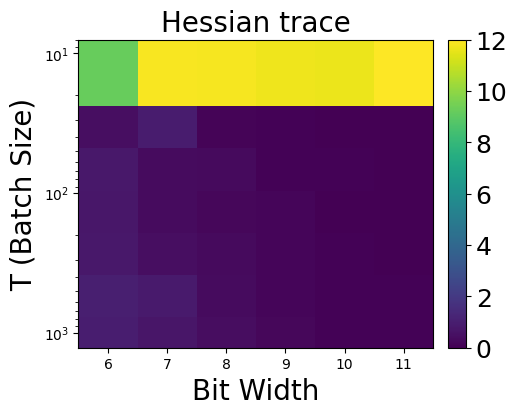

In [26]:
width_list = [6, 7, 8, 9, 10,11]# [6,7, #[2, 3, 4, 6, 8, 11, 16, 23, 32, 45, 64, 91, 128]
bs_list = [16, 32, 64, 128, 256, 512, 1024]
lr_list = [0.1, 0.05, 0.025, 0.0125, 0.00625, 0.003125, 0.0015625]
metric_list = ['hessian_t']
# metric_list = ['fisher']#, 'loss']#, 'CKA', 'hessian_e', 'hessian_t', 'mode_connectivity', 'L2']
# metric_list = ['test_acc', 'loss']#, 'CKA', 'hessian_e', 'hessian_t', 'mode_connectivity', 'L2']
# metric_list = ['test_acc', 'loss', 'hessian_t', 'hessian_e', 'CKA', 'neural_eff']#, 'CKA', 'hessian_e', 'hessian_t', 'mode_connectivity', 'L2']
# metric_list = ['test_acc', 'loss', 'hessian_t', 'hessian_e', 'CKA', 'neural_eff', 'gradient']#, 'CKA', 'hessian_e', 'hessian_t', 'mode_connectivity', 'L2']
# metric_list = ['test_acc', 'loss', 'hessian_t']#, 'CKA', 'hessian_e', 'hessian_t', 'mode_connectivity', 'L2']
# metric_list = ['test_acc', 'loss', 'hessian_t', 'CKA',]# 'hessian_e', 'hessian_t', 'mode_connectivity', 'L2']
metric_title_list = ['Fisher', 'Test loss', 'Hessian trace', 'CKA', 'Model distance (L2)', 'Neural Efficiency', 'Gradient Traces', 'Model distance (L2)']
metric_title_list = ['Hessian trace']

# bs_list = lr_list

for metric, metric_title in zip(metric_list, metric_title_list):

    lenx = len(width_list)
    leny = len(bs_list)
    phase2D = np.zeros((leny, lenx))

    for j,width in enumerate(width_list):
        for i,lr in enumerate(bs_list):
            # ckpt_folder = f'../../checkpoint/different_knobs_subset_10/lr_{lr}/lr_decay/JT_{width}b/'
            ckpt_folder = f'../checkpoint/different_knobs_subset_10/bs_{lr}/normal/JT_{width}b/'
            metric_file = get_metric_file(ckpt_folder, metric)
            phase2D[i][j] = get_metric_val(metric_file, metric)
    print(width_list)
    print(bs_list)
    print(f'Metric : {metric} - max/min : {phase2D.max()}/{phase2D.min()}')
    plot_2Dphase(phase2D, width_list, bs_list, metric, metric_title)


In [27]:
print(phase2D.min())
print(phase2D.max())

0.0011720038097604694
12.024023181766658


In [28]:
phase2D

array([[9.22397664e+00, 1.18715168e+01, 1.18445221e+01, 1.16986912e+01,
        1.16253555e+01, 1.20240232e+01],
       [4.35310424e-01, 8.90731441e-01, 1.30497555e-01, 8.06219264e-02,
        3.14709554e-02, 1.17200381e-03],
       [7.60651708e-01, 3.60340091e-01, 2.82861428e-01, 7.66216926e-02,
        8.28352170e-02, 3.47751521e-02],
       [7.10510304e-01, 3.38124111e-01, 2.25022592e-01, 1.44836560e-01,
        4.19899968e-02, 2.48088943e-02],
       [7.77697255e-01, 4.64310676e-01, 2.82417036e-01, 1.43169913e-01,
        7.67852293e-02, 3.64772594e-02],
       [1.00587361e+00, 8.04680015e-01, 3.59827690e-01, 1.43829264e-01,
        9.20806225e-02, 5.36943359e-02],
       [9.56549632e-01, 6.74035507e-01, 4.17192030e-01, 1.90832298e-01,
        8.91530494e-02, 5.08718313e-02]])

In [10]:
from sklearn.preprocessing import normalize


In [184]:
# phase2D[0] = np.array([4682.82568359, 4404.46289062, 5138.51220703, 4710.23242188, 5554.37548828, 5293.68017578])

for idx in range(len(phase2D)):
    phase2D[idx] = phase2D[idx] / np.linalg.norm(phase2D[idx])

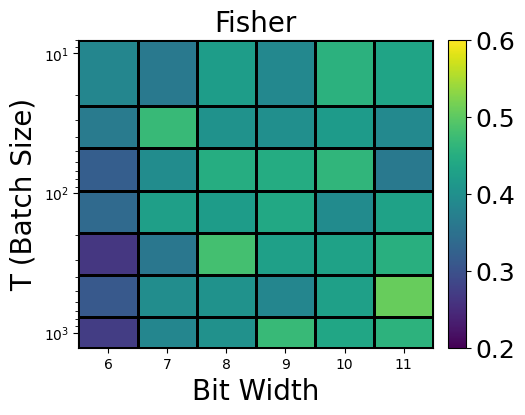

In [185]:


plot_2Dphase(phase2D, width_list, bs_list, metric, metric_title)


In [186]:
print(phase2D.min())
print(phase2D.max())

0.2632078651587254
0.5066821292471014
